In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import scipy.stats as stats

In [3]:
pip install feature_engine


The following command must be run outside of the IPython shell:

    $ pip install feature_engine

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [4]:
import feature_engine

ModuleNotFoundError: No module named 'feature_engine'

In [24]:
stip = pd.read_csv("csv")

In [25]:
# EXTERNAL KNOWLEDGE USED FOR INTERPRETATION

# from http://www.phdstipends.com/results :
# The living wage ratio (LW ratio) normalizes each gross pay entry to the local living wage. 
# The purpose is to allow you to quickly compare the pay received by students at universities in different cost-of-living areas. 

In [26]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [27]:
stip.head()

,University,Department,Overall Pay,LW Ratio,Academic Year,Program Year,12 M Gross Pay,9 M Gross Pay,3 M Gross Pay,Fees,Comments
0,University of Tennessee - Knoxville,Economics,"$1,850",0.09,2020-2021,1st,NaN,"$1,850",NaN,NaN,NaN
1,University of Arizona (U of A),Economics,"$21,000",1.01,2020-2021,1st,NaN,"$21,000",NaN,NaN,$10500 per semester. RA/TA required. Need to pay ~$600 per semester.
2,University of Arizona (U of A),Economics,"$19,800",0.96,2020-2021,1st,NaN,"$21,000",NaN,"$1,200",NaN
3,University of Florida,ECE,"$22,600",NaN,2020-2021,1st,"$24,000",NaN,NaN,"$1,400",NaN
4,University of Virginia (UVA),ECE,"$26,000",1.14,2020-2021,1st,"$26,000",NaN,NaN,NaN,NaN


In [28]:
stip.shape

(8707, 11)

In [29]:
stip.columns

Index(['University', 'Department', 'Overall Pay', 'LW Ratio', 'Academic Year',
       'Program Year', '12 M Gross Pay', '9 M Gross Pay', '3 M Gross Pay',
       'Fees', 'Comments'],
      dtype='object')

In [30]:
stip.columns = stip.columns.str.replace(' ', '_')

In [31]:
stip.columns          # stip.columns.values will yield an exactly identical output this time

Index(['University', 'Department', 'Overall_Pay', 'LW_Ratio', 'Academic_Year',
       'Program_Year', '12_M_Gross_Pay', '9_M_Gross_Pay', '3_M_Gross_Pay',
       'Fees', 'Comments'],
      dtype='object')

In [164]:
stip.info(verbose=True)   # should overall pay be an object ??? probably not!? LW_Ratio is the only numeric var !!?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8706 entries, 0 to 8706
Data columns (total 18 columns):
University         8443 non-null object
Department         8246 non-null object
Overall_Pay        8685 non-null object
LW_Ratio           7795 non-null float64
Academic_Year      8702 non-null object
Program_Year       7686 non-null object
12_M_Gross_Pay     6208 non-null object
9_M_Gross_Pay      2474 non-null object
3_M_Gross_Pay      798 non-null object
Fees               3351 non-null object
Comments           2155 non-null object
Acad_Y             8702 non-null Int64
Overall_Pay_num    8685 non-null Int64
GrossPay_12M       6208 non-null Int64
GrossPay_9M        2474 non-null Int64
GrossPay_3M        798 non-null Int64
Fees_num           3351 non-null Int64
Dep_DR             8246 non-null object
dtypes: Int64(6), float64(1), object(11)
memory usage: 1.6+ MB


In [33]:
stip.isna().sum(axis = 0)

University        263 
Department        460 
Overall_Pay       21  
LW_Ratio          911 
Academic_Year     4   
Program_Year      1020
12_M_Gross_Pay    2498
9_M_Gross_Pay     6233
3_M_Gross_Pay     7909
Fees              5355
Comments          6552
dtype: int64

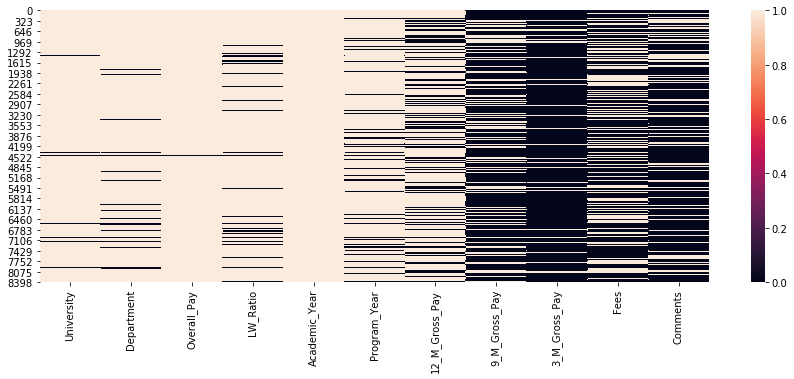

In [34]:
plt.figure(figsize=(15,5))
sns.heatmap(stip.notna())
plt.show()

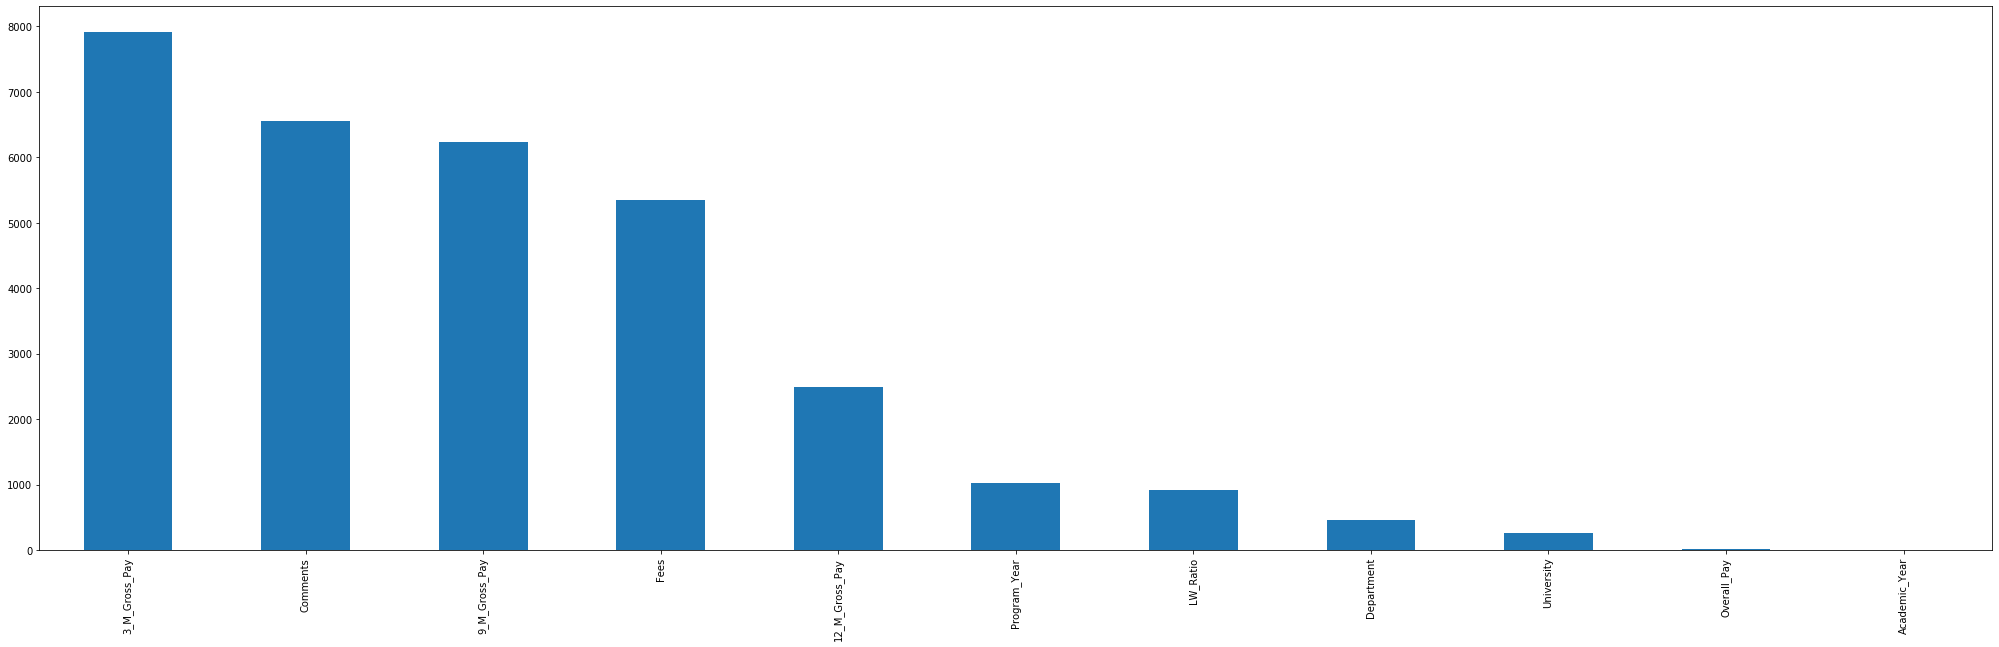

In [35]:
stip.isnull().sum().sort_values(ascending=False).plot(kind='bar', figsize=(35,10), logy=False)

In [36]:
# Overall pay should probably be recoded to value ranges - remove the $ in a first step and save as integers!?
# Academic Year: extract the start year and recode to numeric! 2021-2022? 
# ... why not ... these students just already know the size of their stipend as well as of their fees ...
# create meaningful groups to get rid of the values occurring only once!? (College of Charleston: € Universities!?)
# relationship between 3/9/12M gross pays? recode to numeric after removing the $ sign!
# comments: of any relevance!?! -> probably: just forget about them!? ev helpful to explain low salaries?!?? ;)

for var in stip.columns:
    print("---- %s ---" % var)
    print(stip[var].value_counts(dropna=False))

---- University ---
NaN                                                 263
Duke University (DU)                                172
University of North Carolina - Chapel Hill (UNC)    146
University of California - Berkeley                 140
University of Michigan - Ann Arbor (UM)             135
                                                   ... 
Aarhus University                                   1  
Creighton University (CU)                           1  
UC Davis                                            1  
DePaul University                                   1  
Eastern Virginia Medical School                     1  
Name: University, Length: 693, dtype: int64
---- Department ---
NaN                                          460
Chemistry                                    335
English                                      237
Psychology                                   212
Sociology                                    209
                                            ... 
Pharma

In [37]:
stip['Acad_Y'] = stip.Academic_Year.str.slice(0, 4)

In [38]:
stip['Acad_Y'].describe()

count     8703
unique    20  
top       2016
freq      2198
Name: Acad_Y, dtype: object

In [39]:
stip.Acad_Y = pd.to_numeric(stip.Acad_Y)
stip.Acad_Y = stip.Acad_Y.astype('Int64')

In [40]:
stip['Acad_Y'].describe()

count    8703.000000
mean     2017.053660
std      2.055927   
min      2002.000000
25%      2016.000000
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: Acad_Y, dtype: float64

C:\Users\Diana Roccaro\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Diana Roccaro\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([6.000e+00, 4.000e+00, 3.000e+00, 5.000e+00, 1.400e+01, 1.600e+01,
        8.000e+00, 1.400e+01, 2.700e+01, 4.100e+01, 0.000e+00, 4.100e+01,
        9.700e+01, 5.560e+02, 4.270e+02, 2.198e+03, 1.197e+03, 1.911e+03,
        1.369e+03, 7.670e+02, 2.000e+00]),
 array([2002.0, 2002.904761904762, 2003.8095238095239, 2004.7142857142858,
        2005.6190476190477, 2006.5238095238096, 2007.4285714285713,
        2008.3333333333333, 2009.2380952380952, 2010.142857142857,
        2011.047619047619, 2011.952380952381, 2012.857142857143,
        2013.7619047619048, 2014.6666666666667, 2015.5714285714287,
        2016.4761904761904, 2017.3809523809523, 2018.2857142857142,
        2019.1904761904761, 2020.095238095238, 2021.0], dtype=object),
 <a list of 21 Patch objects>)

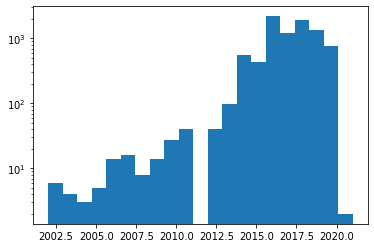

In [41]:
# -> EXCLUDE THE YEAR WITHOUT ANY OBSERVATIONS?!?!?
# my bins are not too perfect yet ;) ... note however: there seems to be a year completely lacking observations!!!

plt.hist(stip.Acad_Y, log=True, bins=21) # -> log scale would be nicer -> much better :)

In [42]:
# stip['Overall_Pay_2'] = stip['Overall_Pay'].str.slice(1, -1)
# bad idea!
# I lost some unique values by cutting off by position! try to remove the $ sign instead!!

In [43]:
stip.Overall_Pay.describe()

count     8686   
unique    2600   
top       $30,000
freq      330    
Name: Overall_Pay, dtype: object

In [44]:
stip['Overall_Pay_num'] = stip.Overall_Pay.str.replace('$', '')

In [45]:
stip.Overall_Pay_num.describe() # looks much better :) -> convert to numeric now!

count     8686  
unique    2600  
top       30,000
freq      330   
Name: Overall_Pay_num, dtype: object

In [46]:
# also commas were not interpretable ... -> remove them as well:

stip['Overall_Pay_num'] = stip.Overall_Pay_num.str.replace(',', '')

In [47]:
stip.Overall_Pay_num.describe()

count     8686 
unique    2600 
top       30000
freq      330  
Name: Overall_Pay_num, dtype: object

In [48]:
stip.Overall_Pay_num.value_counts(dropna=False)

30000     330
25000     220
24000     217
20000     181
27000     170
         ... 
13482     1  
26312     1  
-29000    1  
23540     1  
19280     1  
Name: Overall_Pay_num, Length: 2601, dtype: int64

In [49]:
stip['Overall_Pay_num'] = pd.to_numeric(stip.Overall_Pay_num)

In [50]:
stip.Overall_Pay_num.describe()

count    8686.000000  
mean     25124.187313 
std      21644.907925 
min     -900000.000000
25%      19035.500000 
50%      25000.000000 
75%      30400.000000 
max      994000.000000
Name: Overall_Pay_num, dtype: float64

In [51]:
# doublecheck, whether e.g. the 10 most frequent values of the original variable match those of my recoded one!! ;)

stip.Overall_Pay_num.value_counts().sort_values(ascending=False)       #.plot.bar()

30000.0    330
25000.0    220
24000.0    217
20000.0    181
27000.0    170
          ... 
28470.0    1  
18058.0    1  
25412.0    1  
43692.0    1  
35280.0    1  
Name: Overall_Pay_num, Length: 2600, dtype: int64

In [52]:
stip.Overall_Pay_num = stip.Overall_Pay_num.astype('Int64')

In [53]:
type(stip['Overall_Pay_num'][0])

numpy.int64

In [54]:
stip.Overall_Pay_num.histogram()

AttributeError: 'Series' object has no attribute 'histogram'

In [55]:
stip.Overall_Pay_num.plot   #(type='hist')

In [56]:
plot(stip.Overall_Pay_num)

NameError: name 'plot' is not defined

In [57]:
stip.Overall_Pay_num.unique()

<IntegerArray>
[  1850,  21000,  19800,  22600,  26000,  27333,  35000,  18500,  32851,
  33500,
 ...
  23034,  29804,  18058,  14842,  28083, 220000,  21212,  22061,  33360,
  29840]
Length: 2601, dtype: Int64

In [58]:
stip.Overall_Pay_num.nunique()

2600

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.578e+03, 9.500e+01,
        9.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([-900000.0, -710600.0, -521200.0, -331800.0, -142400.0, 47000.0,
        236400.0, 425800.0, 615200.0, 804600.0, 994000.0], dtype=object),
 <a list of 10 Patch objects>)

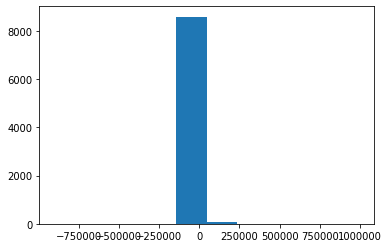

In [59]:
plt.hist(stip.Overall_Pay_num) # -> there seem to be crazy min & max values... !?

In [60]:
stip.describe() # -> look at the -900'000 line -> comment helpful? what to do about this guy?

# -> fees = $1,000,000 for this guy ... -> overall pay = 12_M_Gross_Pay - Fees ;) ... ...

,LW_Ratio,Acad_Y,Overall_Pay_num
count,7796.000000,8703.000000,8686.000000
mean,1.075777,2017.053660,25124.187313
std,0.828874,2.055927,21644.907925
min,-34.010000,2002.000000,-900000.000000
25%,0.850000,2016.000000,19035.500000
50%,1.100000,2017.000000,25000.000000
75%,1.300000,2018.000000,30400.000000
max,40.970000,2021.000000,994000.000000


In [61]:
crazy = stip.loc[stip['Overall_Pay_num']==-900000.000000]

In [62]:
crazy

,University,Department,Overall_Pay,LW_Ratio,Academic_Year,Program_Year,12_M_Gross_Pay,9_M_Gross_Pay,3_M_Gross_Pay,Fees,Comments,Acad_Y,Overall_Pay_num
3350,University of California - San Diego (UCSD),Information Technology,"$-900,000",-34.01,2018-2019,2nd,"$100,000",NaN,NaN,"$1,000,000",NaN,2018,-900000


In [63]:
# Overall Pay kann durchaus negative Werte annehmen: wenn die Semestergebühren höher sind als das Einkommen ...

neg = stip.loc[stip['Overall_Pay_num']<0]
len(neg)

74

In [64]:
neg.head()

,University,Department,Overall_Pay,LW_Ratio,Academic_Year,Program_Year,12_M_Gross_Pay,9_M_Gross_Pay,3_M_Gross_Pay,Fees,Comments,Acad_Y,Overall_Pay_num
226,DePaul University,School of Computing,"$-4,600",NaN,2020-2021,1st,NaN,"$2,200",NaN,"$6,800",NaN,2020,-4600
231,Northcentral University,Education,$-250,-0.01,2020-2021,3rd,NaN,NaN,NaN,$250,NaN,2020,-250
270,Texas Tech University (TTU),Mechanical,"$-29,000",-1.43,2020-2021,NaN,NaN,NaN,NaN,"$29,000",NaN,2020,-29000
304,Carnegie Mellon University (CMU),Neuroscience,"$-14,378",-0.69,2020-2021,1st,"$33,204",NaN,NaN,"$47,582",NaN,2020,-14378
305,University of Pennsylvania,Mechanical Engineering,"$-6,743",-0.28,2020-2021,NaN,"$34,500",NaN,NaN,"$41,243",NaN,2020,-6743


In [65]:
neg

# looks like they have to pay fees, they earn money (gross pay), and overall pay = gross pay - fees ? :) -> check!

,University,Department,Overall_Pay,LW_Ratio,Academic_Year,Program_Year,12_M_Gross_Pay,9_M_Gross_Pay,3_M_Gross_Pay,Fees,Comments,Acad_Y,Overall_Pay_num
226,DePaul University,School of Computing,"$-4,600",NaN,2020-2021,1st,NaN,"$2,200",NaN,"$6,800",NaN,2020,-4600
231,Northcentral University,Education,$-250,-0.01,2020-2021,3rd,NaN,NaN,NaN,$250,NaN,2020,-250
270,Texas Tech University (TTU),Mechanical,"$-29,000",-1.43,2020-2021,NaN,NaN,NaN,NaN,"$29,000",NaN,2020,-29000
304,Carnegie Mellon University (CMU),Neuroscience,"$-14,378",-0.69,2020-2021,1st,"$33,204",NaN,NaN,"$47,582",NaN,2020,-14378
305,University of Pennsylvania,Mechanical Engineering,"$-6,743",-0.28,2020-2021,NaN,"$34,500",NaN,NaN,"$41,243",NaN,2020,-6743
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8126,Indiana University,Economics,"$-4,000",-0.23,2014-2015,1st,"$1,000",NaN,NaN,"$5,000",NaN,2014,-4000
8271,Texas A&amp;M; University - College Station,Political Science,$-500,NaN,2015-2016,1st,"$1,800",NaN,NaN,"$2,300",NaN,2015,-500
8323,North Carolina State University (NCSU),Civil Engineering,$-469,-0.02,2013-2014,4th,"$1,800",NaN,NaN,"$2,269",NaN,2013,-469
8389,NaN,NaN,"$-11,800",NaN,2014-2015,NaN,"$2,200",NaN,NaN,"$14,000",NaN,2014,-11800


In [66]:
stip['12_M_Gross_Pay'].describe()

count     6209   
unique    1275   
top       $30,000
freq      418    
Name: 12_M_Gross_Pay, dtype: object

In [67]:
stip['GrossPay_12M'] = stip['12_M_Gross_Pay'].str.replace('$', '')
stip.GrossPay_12M = stip.GrossPay_12M.str.replace(',', '')

In [68]:
stip.GrossPay_12M.describe()

count     6209 
unique    1275 
top       30000
freq      418  
Name: GrossPay_12M, dtype: object

In [69]:
stip.GrossPay_12M = pd.to_numeric(stip.GrossPay_12M)
stip.GrossPay_12M = stip.GrossPay_12M.astype('Int64')

In [70]:
stip.GrossPay_12M.describe() # 1M guy: again rather unlikely... -> explore further!!!

count    6209.000000   
mean     28240.055403  
std      21342.627311  
min      1.000000      
25%      23000.000000  
50%      28000.000000  
75%      32000.000000  
max      1000000.000000
Name: GrossPay_12M, dtype: float64

C:\Users\Diana Roccaro\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Diana Roccaro\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([6.188e+03, 6.000e+00, 8.000e+00, 4.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0, 100000.9, 200000.8, 300000.69999999995, 400000.6, 500000.5,
        600000.3999999999, 700000.2999999999, 800000.2, 900000.1,
        1000000.0], dtype=object),
 <a list of 10 Patch objects>)

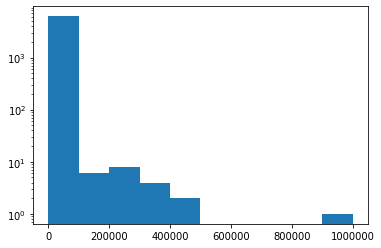

In [71]:
plt.hist(stip.GrossPay_12M, log=True) # -> top value: investigate further!

In [72]:
stip.GrossPay_12M.value_counts(bins=5) # -> cutting @40k could make sense? just remove the outlier!?

(-999.0, 200000.8]       6199
(200000.8, 400000.6]     8   
(800000.2, 1000000.0]    1   
(400000.6, 600000.4]     1   
(600000.4, 800000.2]     0   
Name: GrossPay_12M, dtype: int64

In [73]:
# 3ry year Computer Science @MIT: fees = 40k !?!??

stip.loc[stip.GrossPay_12M == 100000]

# neg = stip.loc[stip['Overall_Pay_num']<0]

,University,Department,Overall_Pay,LW_Ratio,Academic_Year,Program_Year,12_M_Gross_Pay,9_M_Gross_Pay,3_M_Gross_Pay,Fees,Comments,Acad_Y,Overall_Pay_num,GrossPay_12M
1734,University of Pennsylvania,NaN,"$100,000",4.15,2018-2019,2nd,"$100,000",NaN,NaN,NaN,NaN,2018,100000,100000
1899,Massachusetts Institute of Technology (MIT),computer science,"$60,000",2.15,2018-2019,3rd,"$100,000",NaN,NaN,"$40,000",NaN,2018,60000,100000
2482,Harvard University (HU),Finance,"$95,000",3.32,2018-2019,2nd,"$100,000",NaN,NaN,"$5,000",NaN,2018,95000,100000
2586,NaN,NaN,"$100,000",NaN,2018-2019,NaN,"$100,000",NaN,NaN,NaN,NaN,2018,100000,100000
2972,University of Minnesota - Twin Cities (UM),Psychology,"$90,000",3.93,2019-2020,1st,"$100,000",NaN,NaN,"$10,000",NaN,2019,90000,100000
2974,Pennsylvania State University (Penn State),Clinical Psychology,"$90,000",4.01,2019-2020,1st,"$100,000",NaN,NaN,"$10,000",NaN,2019,90000,100000
2975,Columbia University (CU),Clinical Psychology,"$90,000",3.03,2019-2020,1st,"$100,000",NaN,NaN,"$10,000",NaN,2019,90000,100000
3350,University of California - San Diego (UCSD),Information Technology,"$-900,000",-34.01,2018-2019,2nd,"$100,000",NaN,NaN,"$1,000,000",NaN,2018,-900000,100000


In [74]:
stip['9_M_Gross_Pay'].describe()

count     2474   
unique    748    
top       $18,000
freq      168    
Name: 9_M_Gross_Pay, dtype: object

In [75]:
stip['GrossPay_9M'] = stip['9_M_Gross_Pay'].str.replace('$', '')
stip.GrossPay_9M = stip.GrossPay_9M.str.replace(',', '')

In [76]:
stip.GrossPay_9M.describe()

count     2474 
unique    748  
top       18000
freq      168  
Name: GrossPay_9M, dtype: object

In [77]:
stip.GrossPay_9M = pd.to_numeric(stip.GrossPay_9M)
stip.GrossPay_9M = stip.GrossPay_9M.astype('Int64')

In [78]:
stip.GrossPay_9M.describe()    # 189 k in 9 Months!? not bad!?!?!?!? ...

count    2474.000000  
mean     19596.169361 
std      8944.673519  
min      5.000000     
25%      15900.000000 
50%      19000.000000 
75%      23000.000000 
max      189600.000000
Name: GrossPay_9M, dtype: float64

C:\Users\Diana Roccaro\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Diana Roccaro\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.204e+03, 1.240e+03, 2.100e+01, 2.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([5.0, 18964.5, 37924.0, 56883.5, 75843.0, 94802.5, 113762.0,
        132721.5, 151681.0, 170640.5, 189600.0], dtype=object),
 <a list of 10 Patch objects>)

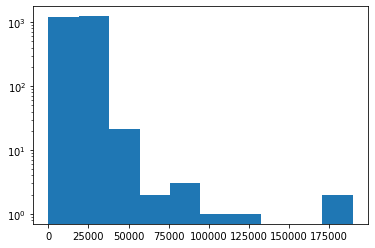

In [79]:
plt.hist(stip.GrossPay_9M, log=True) # -> top value: investigate further! (much more reasonable than @12M!?)

In [80]:
stip['3_M_Gross_Pay'].describe()

count     798   
unique    210   
top       $3,000
freq      101   
Name: 3_M_Gross_Pay, dtype: object

In [81]:
stip['GrossPay_3M'] = stip['3_M_Gross_Pay'].str.replace('$', '')
stip.GrossPay_3M = stip.GrossPay_3M.str.replace(',', '')

# stip.GrossPay_3M.describe()

stip.GrossPay_3M = pd.to_numeric(stip.GrossPay_3M)
stip.GrossPay_3M = stip.GrossPay_3M.astype('Int64')

stip.GrossPay_3M.describe()    # 56 k in 3 Months!? not bad!?!?!?!? ...

count    798.000000  
mean     5043.095238 
std      3743.738055 
min      3.000000    
25%      3000.000000 
50%      4500.000000 
75%      6000.000000 
max      55816.000000
Name: GrossPay_3M, dtype: float64

(array([567., 204.,  18.,   4.,   2.,   0.,   1.,   0.,   1.,   1.]),
 array([3.0, 5584.3, 11165.6, 16746.9, 22328.2, 27909.5, 33490.8, 39072.1,
        44653.4, 50234.700000000004, 55816.0], dtype=object),
 <a list of 10 Patch objects>)

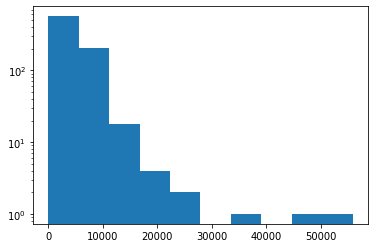

In [82]:
plt.hist(stip.GrossPay_3M, log=True) # -> top value: investigate further! (much more reasonable than @12M!?)

In [83]:
stip.Fees.describe()

count     3352  
unique    769   
top       $1,000
freq      214   
Name: Fees, dtype: object

In [84]:
stip['Fees_num'] = stip.Fees.str.replace('$', '')
stip['Fees_num'] = stip.Fees_num.str.replace(',', '')

In [85]:
stip.Fees_num.describe()

count     3352
unique    769 
top       1000
freq      214 
Name: Fees_num, dtype: object

In [86]:
stip.Fees_num = pd.to_numeric(stip.Fees_num)

In [87]:
type(stip.Fees_num[0])

numpy.float64

In [88]:
# observation 3350 seems pretty useless -> simply delete this observation completely!? no value!?

stip.Fees_num = stip.Fees_num.astype('Int64')

(array([3.351e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0, 100000.9, 200000.8, 300000.69999999995, 400000.6, 500000.5,
        600000.3999999999, 700000.2999999999, 800000.2, 900000.1,
        1000000.0], dtype=object),
 <a list of 10 Patch objects>)

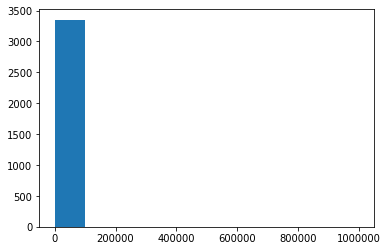

In [89]:


plt.hist(stip.Fees_num) # -> there seem to be crazy min & max values... !?

In [90]:
stip.Fees_num.nunique()

769

In [91]:
stip.Fees_num.unique() # was not very helpful when they were float. Integer conversion -> let's try ...

<IntegerArray>
[ NaN, 1200, 1400, 2000,  250, 9000,  200,  800,   42,  900,
 ...
  246,  288, 3663,  735, 1276, 5048, 4983, 5193, 5330, 4958]
Length: 770, dtype: Int64

In [92]:
stip.Fees_num.value_counts(dropna=False).sort_values(ascending=False)[0:9]    # looks reasonable? :)

NaN     5355
1000    214 
2000    204 
500     161 
1200    111 
1500    105 
3000    92  
200     92  
600     90  
Name: Fees_num, dtype: int64

In [93]:
stip.Fees_num.describe()

count    3352.000000   
mean     2869.667661   
std      18471.151022  
min      1.000000      
25%      500.000000    
50%      1005.500000   
75%      2000.000000   
max      1000000.000000
Name: Fees_num, dtype: float64

In [94]:
# -> how many students pay fees higher than 3'000 ?

high_fees = stip.loc[stip['Fees_num']>3000]
len(high_fees)

448

In [95]:
high_fees

,University,Department,Overall_Pay,LW_Ratio,Academic_Year,Program_Year,12_M_Gross_Pay,9_M_Gross_Pay,3_M_Gross_Pay,Fees,Comments,Acad_Y,Overall_Pay_num,GrossPay_12M,GrossPay_9M,GrossPay_3M,Fees_num
21,Dalhousie University,Psychology and Neuroscience,"$10,000",NaN,2019-2020,1st,"$19,000",NaN,NaN,"$9,000","Our funding is also capped. This means that even if we win grants in an amount that surpasses our funding cap then we get the award as an ""honourary"".",2019,10000,19000,NaN,NaN,9000
38,University of Virginia (UVA),Economics,"$22,500",0.99,2019-2020,1st,"$28,500",NaN,NaN,"$6,000",NaN,2019,22500,28500,NaN,NaN,6000
39,NaN,NaN,"$22,000",NaN,2020-2021,5th,"$27,000",NaN,NaN,"$5,000",NaN,2020,22000,27000,NaN,NaN,5000
58,University of Georgia (UGA),Pharmaceutical and Biomedical Sciences,"$25,600",1.21,2019-2020,1st,"$29,150",NaN,NaN,"$3,550",NaN,2019,25600,29150,NaN,NaN,3550
62,University of British Columbia,NaN,"$14,400",NaN,2020-2021,4th,"$20,000",NaN,NaN,"$5,600",NaN,2020,14400,20000,NaN,NaN,5600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8669,New Mexico State University (NMSU),Astronomy,"$23,034",1.36,2012-2013,3rd,NaN,"$16,100","$11,917","$4,983","Summer/Other includes $10,000 NM Space Grant Fellowship",2012,23034,NaN,16100,11917,4983
8670,New Mexico State University (NMSU),Astronomy,"$29,804",1.76,2013-2014,4th,NaN,"$16,665","$18,332","$5,193","Summer/Other includes $10,000 NM Space Grant Fellowship",2013,29804,NaN,16665,18332,5193
8671,New Mexico State University (NMSU),Astronomy,"$18,058",1.07,2011-2012,2nd,NaN,"$15,800","$7,588","$5,330",NaN,2011,18058,NaN,15800,7588,5330
8672,New Mexico State University (NMSU),Astronomy,"$14,842",0.88,2010-2011,1st,NaN,"$15,800","$4,000","$4,958",NaN,2010,14842,NaN,15800,4000,4958


In [96]:
stip.Fees_num.value_counts(dropna=False).sort_values(ascending=False)[10:19]

300     73
2500    67
400     59
900     55
1800    51
100     50
150     40
1400    40
1600    38
Name: Fees_num, dtype: int64

In [97]:
unique_fees = stip.Fees_num.unique() # so what? ... let's try another way ...
unique_fees

<IntegerArray>
[ NaN, 1200, 1400, 2000,  250, 9000,  200,  800,   42,  900,
 ...
  246,  288, 3663,  735, 1276, 5048, 4983, 5193, 5330, 4958]
Length: 770, dtype: Int64

In [98]:
above_9k = stip.loc[stip['Fees_num']>9000]
len(above_9k)

156

In [99]:
above_9k             # why the hell 41k fees for 1st year Neurosciences???

,University,Department,Overall_Pay,LW_Ratio,Academic_Year,Program_Year,12_M_Gross_Pay,9_M_Gross_Pay,3_M_Gross_Pay,Fees,Comments,Acad_Y,Overall_Pay_num,GrossPay_12M,GrossPay_9M,GrossPay_3M,Fees_num
270,Texas Tech University (TTU),Mechanical,"$-29,000",-1.43,2020-2021,NaN,NaN,NaN,NaN,"$29,000",NaN,2020,-29000,NaN,NaN,NaN,29000
304,Carnegie Mellon University (CMU),Neuroscience,"$-14,378",-0.69,2020-2021,1st,"$33,204",NaN,NaN,"$47,582",NaN,2020,-14378,33204,NaN,NaN,47582
305,University of Pennsylvania,Mechanical Engineering,"$-6,743",-0.28,2020-2021,NaN,"$34,500",NaN,NaN,"$41,243",NaN,2020,-6743,34500,NaN,NaN,41243
410,University of California - San Diego (UCSD),VisualArts,"$17,239",0.65,2020-2021,1st,"$31,406",NaN,NaN,"$14,167",NaN,2020,17239,31406,NaN,NaN,14167
554,Wayne State University,immunotherapy,"$35,000",1.68,2020-2021,NaN,"$45,000",NaN,NaN,"$10,000",NaN,2020,35000,45000,NaN,NaN,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8083,University of California - Riverside (UCR),Material Science and Engineering,"$21,500",0.89,2015-2016,1st,"$34,000",NaN,NaN,"$12,500",NaN,2015,21500,34000,NaN,NaN,12500
8097,Texas Woman&#39;s University,Sociology,"$6,363",NaN,2014-2015,5th,NaN,"$14,454","$2,409","$10,500","Tuition and fees are roughly $3500 a semester for 2 courses. If you take 3 courses, it would be more. There are no tuition waivers.",2014,6363,NaN,14454,2409,10500
8174,University of Maryland - College Park (UMD),Mechanical Engineering,"$31,664",1.05,2015-2016,NaN,"$43,990",NaN,NaN,"$12,326",NaN,2015,31664,43990,NaN,NaN,12326
8175,University of Maryland - College Park (UMD),Mechanical Engineering,"$19,674",0.65,2015-2016,NaN,"$32,000",NaN,NaN,"$12,326",NaN,2015,19674,32000,NaN,NaN,12326


In [100]:
# -> how many students pay fees higher than 3'000 ?

crazy_fees = stip.loc[stip['Fees_num']>50000]
len(crazy_fees)

15

In [101]:
crazy_fees

,University,Department,Overall_Pay,LW_Ratio,Academic_Year,Program_Year,12_M_Gross_Pay,9_M_Gross_Pay,3_M_Gross_Pay,Fees,Comments,Acad_Y,Overall_Pay_num,GrossPay_12M,GrossPay_9M,GrossPay_3M,Fees_num
766,University of Chicago (UC),Linguistics,"$31,000",1.28,2020-2021,1st,"$98,000",NaN,NaN,"$67,000",NaN,2020,31000,98000,NaN,NaN,67000
767,Duke University (DU),Nursing,"$4,544",0.20,2020-2021,1st,"$98,269",NaN,NaN,"$93,725",NaN,2020,4544,98269,NaN,NaN,93725
1951,Johns Hopkins University (JHU),Neuroscience,"$-20,449",-0.80,2019-2020,2nd,"$33,551",NaN,NaN,"$54,000",NaN,2019,-20449,33551,NaN,NaN,54000
2223,Purdue University - West Lafayette,physics,"$-80,000",-3.78,2019-2020,1st,"$20,000",NaN,NaN,"$100,000",NaN,2019,-80000,20000,NaN,NaN,100000
2550,University of Alberta,Earth and Atmospheric Sciences,"$-32,208",NaN,2018-2019,1st,"$24,000",NaN,NaN,"$56,208",NaN,2018,-32208,24000,NaN,NaN,56208
2933,Princeton University,Geological Sciences,"$40,900",1.61,2019-2020,1st,"$94,670",NaN,NaN,"$53,770",NaN,2019,40900,94670,NaN,NaN,53770
3350,University of California - San Diego (UCSD),Information Technology,"$-900,000",-34.01,2018-2019,2nd,"$100,000",NaN,NaN,"$1,000,000",NaN,2018,-900000,100000,NaN,NaN,1000000
3834,Virginia Tech,education,NaN,0.00,2019-2020,5th,"$76,666",NaN,NaN,"$76,666",7777,2019,NaN,76666,NaN,NaN,76666
5249,Princeton University,Political Science,"$36,500",1.44,2017-2018,1st,"$87,750",NaN,NaN,"$51,250",NaN,2017,36500,87750,NaN,NaN,51250
5395,University of California - San Diego (UCSD),Mechanical and Aerospace Engineering,"$-30,237",-1.14,2016-2017,1st,"$26,763",NaN,NaN,"$57,000",NaN,2016,-30237,26763,NaN,NaN,57000


In [102]:
# relationship between 3/9/12 M Gross Pay Values ??
# we know, what PhD students have earned in 3/9/12 months, but we always have just one of the 3 entries, right?!?!

gross_pay_dup3_12 = stip.loc[stip['12_M_Gross_Pay'] == 4 * stip['3_M_Gross_Pay']]
gross_pay_dup3_9 = stip.loc[stip['9_M_Gross_Pay'] == 3 * stip['3_M_Gross_Pay']]

In [103]:
len(gross_pay_dup3_12)

0

In [104]:
len(gross_pay_dup3_9)

0

In [105]:
gp_test = stip.loc(stip[(stip['3_M_Gross_Pay'].isna() == False) & (stip['9_M_Gross_Pay'].isna() == False)].index)

# hmmm.... let's try this another way ... 

TypeError: unhashable type: 'Int64Index'

In [106]:
available_3M = stip.drop(stip[(stip['3_M_Gross_Pay'].isna() == True)].index)

In [107]:
len(available_3M)

798

In [108]:
# -> it looks like we have 329 observations with a value != NaN for both 3M and 9M gross pay!?!

available_3M['9_M_Gross_Pay'].value_counts(dropna=False)

$18,000    49
$20,000    49
$25,000    40
$21,000    26
$24,000    25
           ..
$13,212    1 
$6,000     1 
$20,699    1 
$22,100    1 
NaN        1 
Name: 9_M_Gross_Pay, Length: 329, dtype: int64

In [109]:
# question: if we have earnings for 12M, do we have earnings for 9M as well in some cases??

available_12M = stip.drop(stip[(stip['12_M_Gross_Pay'].isna() == True)].index)
len(available_12M)

6209

In [110]:
available_12M

,University,Department,Overall_Pay,LW_Ratio,Academic_Year,Program_Year,12_M_Gross_Pay,9_M_Gross_Pay,3_M_Gross_Pay,Fees,Comments,Acad_Y,Overall_Pay_num,GrossPay_12M,GrossPay_9M,GrossPay_3M,Fees_num
3,University of Florida,ECE,"$22,600",NaN,2020-2021,1st,"$24,000",NaN,NaN,"$1,400",NaN,2020,22600,24000,NaN,NaN,1400
4,University of Virginia (UVA),ECE,"$26,000",1.14,2020-2021,1st,"$26,000",NaN,NaN,NaN,NaN,2020,26000,26000,NaN,NaN,NaN
5,University of Wisconsin - Madison (UW),NaN,"$27,333",1.20,2020-2021,NaN,"$27,333",NaN,NaN,NaN,NaN,2020,27333,27333,NaN,NaN,NaN
6,Washington University in St. Louis (Wash U),olin,"$35,000",1.69,2020-2021,1st,"$35,000",NaN,NaN,NaN,NaN,2020,35000,35000,NaN,NaN,NaN
11,Wright State University (WSU),BMS,"$21,157",1.07,2020-2021,1st,"$23,157",NaN,NaN,"$2,000",NaN,2020,21157,23157,NaN,NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8702,Duke University (DU),Biochemistry,"$29,840",1.59,2012-2013,6th and up,"$29,840",NaN,NaN,NaN,NaN,2012,29840,29840,NaN,NaN,NaN
8703,University of Virginia (UVA),Chemical Engineering,"$32,000",1.63,2013-2014,4th,"$32,000",NaN,NaN,NaN,"This includes health insurance coverage, tuition, fees/etc. This is from an NSF Graduate Student Fellowship.",2013,32000,32000,NaN,NaN,NaN
8704,Duke University (DU),Biomedical Engineering,"$32,000",1.70,2013-2014,2nd,"$32,000",NaN,NaN,NaN,This is the stipend associated with the NSF Fellowship.,2013,32000,32000,NaN,NaN,NaN
8705,University of Virginia (UVA),Chemical Engineering,"$25,000",1.28,2013-2014,4th,"$25,000",NaN,NaN,NaN,"This stipend includes full health insurance coverage, student fees, tuition, and a gym membership to the University's athletic center.",2013,25000,25000,NaN,NaN,NaN


In [111]:
available_12M['9_M_Gross_Pay'].unique()

array([nan], dtype=object)

In [112]:
available_12M['9_M_Gross_Pay'].value_counts(dropna=False)

NaN    6209
Name: 9_M_Gross_Pay, dtype: int64

In [113]:
available_12M['3_M_Gross_Pay'].value_counts(dropna=False)

NaN    6209
Name: 3_M_Gross_Pay, dtype: int64

In [114]:
stip.LW_Ratio.describe()

count    7796.000000
mean     1.075777   
std      0.828874   
min     -34.010000  
25%      0.850000   
50%      1.100000   
75%      1.300000   
max      40.970000  
Name: LW_Ratio, dtype: float64

In [115]:
stip.LW_Ratio.value_counts(bins=5)

(-4.018, 10.978]      7787
(10.978, 25.974]      7   
(25.974, 40.97]       1   
(-34.086, -19.014]    1   
(-19.014, -4.018]     0   
Name: LW_Ratio, dtype: int64

# DATA CLEANING

In [116]:
# delete the observation of the 1 million fee guy

stip = stip.drop(stip[(stip.Fees_num == 1000000)].index)
stip.shape

(8706, 17)

C:\Users\Diana Roccaro\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Diana Roccaro\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.216e+03, 6.400e+01, 1.700e+01, 2.500e+01, 1.500e+01, 8.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([1.0, 10000.9, 20000.8, 30000.699999999997, 40000.6, 50000.5,
        60000.399999999994, 70000.3, 80000.2, 90000.09999999999, 100000.0],
       dtype=object),
 <a list of 10 Patch objects>)

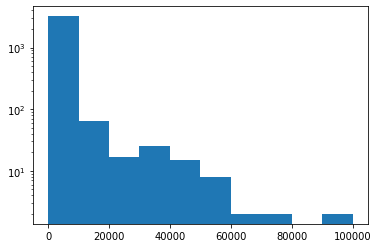

In [117]:
plt.hist(stip.Fees_num, log=True) # -> log scale would be nicer -> much better :)

CATEGORICAL VARIABLE CLEANING

In [118]:
stip.University.value_counts(dropna=False)

NaN                                                 263
Duke University (DU)                                172
University of North Carolina - Chapel Hill (UNC)    146
University of California - Berkeley                 140
University of Michigan - Ann Arbor (UM)             135
                                                   ... 
Aarhus University                                   1  
Creighton University (CU)                           1  
UC Davis                                            1  
DePaul University                                   1  
Eastern Virginia Medical School                     1  
Name: University, Length: 693, dtype: int64

In [119]:
# even the

stip.University.value_counts(dropna=False, normalize=True)

NaN                                                 0.030209
Duke University (DU)                                0.019756
University of North Carolina - Chapel Hill (UNC)    0.016770
University of California - Berkeley                 0.016081
University of Michigan - Ann Arbor (UM)             0.015507
                                                      ...   
Aarhus University                                   0.000115
Creighton University (CU)                           0.000115
UC Davis                                            0.000115
DePaul University                                   0.000115
Eastern Virginia Medical School                     0.000115
Name: University, Length: 693, dtype: float64

In [134]:
stip.University.value_counts(dropna=False, normalize=True).sort_values(ascending=False)[0:30]

NaN                                                  0.030209
Duke University (DU)                                 0.019756
University of North Carolina - Chapel Hill (UNC)     0.016770
University of California - Berkeley                  0.016081
University of Michigan - Ann Arbor (UM)              0.015507
University of Wisconsin - Madison (UW)               0.015047
University of Southern California (USC)              0.014473
University of Illinois - Urbana- Champaign (UIUC)    0.014243
University of California - San Diego (UCSD)          0.013669
University of Pennsylvania                           0.013554
Stanford University (SU)                             0.013439
University of Texas - Austin (UT)                    0.013209
Northwestern University (NU)                         0.013094
University of Minnesota - Twin Cities (UM)           0.012750
Pennsylvania State University (Penn State)           0.012520
University of Chicago (UC)                           0.012176
Universi

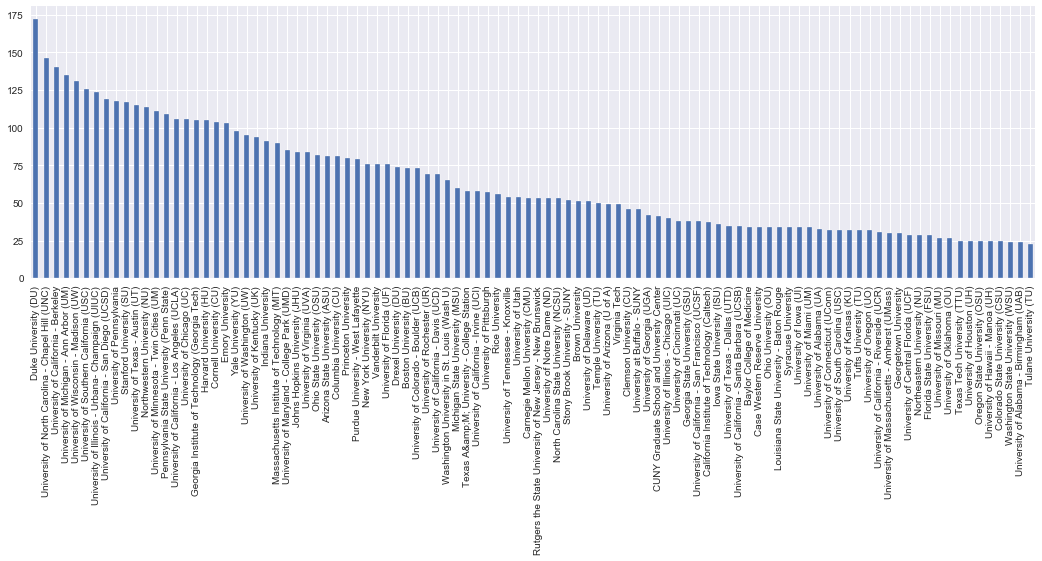

In [148]:
stip.University.value_counts()[0:100].plot(kind="bar", figsize=(18,5))

In [135]:
stip.University.value_counts(dropna=False, normalize=True).sort_values(ascending=False)[31:60]

Arizona State University (ASU)                                0.009304
Princeton University                                          0.009189
Purdue University - West Lafayette                            0.009074
Vanderbilt University                                         0.008730
University of Florida (UF)                                    0.008730
New York University (NYU)                                     0.008730
Drexel University (DU)                                        0.008500
Boston University (BU)                                        0.008385
University of Colorado - Boulder (UCB)                        0.008385
University of Rochester (UR)                                  0.007926
University of California - Davis (UCD)                        0.007926
Washington University in St. Louis (Wash U)                   0.007466
Michigan State University (MSU)                               0.006892
University of California - Irvine (UCI)                       0.006662
Texas 

In [136]:
# just delete these rows out for any comparison of different universities!! Cleaning not worthwile !!! ;)
# 0.0115 % = 1 single observation each !!!

stip.University.value_counts(dropna=False, normalize=True).sort_values()[0:30]

Eastern Virginia Medical School            0.000115
University of Kent, Canterbury             0.000115
nit                                        0.000115
London School of Economics                 0.000115
National Technical University of Athens    0.000115
Universidade Federal de Sao Paulo          0.000115
Inrs                                       0.000115
Sofia University                           0.000115
Villanova                                  0.000115
Anna University                            0.000115
Sorbonne - Paris VI                        0.000115
University of Windsor                      0.000115
university of Massachusetts Amherst        0.000115
HHMI Janelia Research Campus               0.000115
Massey University (New Zealand)            0.000115
Weill Cornell                              0.000115
Penn State College of Medicine             0.000115
University of Tartu                        0.000115
Columbia Teachers College                  0.000115
university o

In [138]:
# just delete these rows out for any comparison of different universities!! Cleaning not worthwile !!! ;)

stip.University.value_counts(dropna=False).sort_values()[31:99]

Texas Woman's University        1
 Clark University               1
University of Nottingham, UK    1
Unoversity of illinois          1
Tribhuvan University            1
                               ..
Rutgers University              1
Unniversity of Hawaii Manoa     1
Clark University                1
Pacifica Graduate Institute     1
esf                             1
Name: University, Length: 68, dtype: int64

In [139]:
uni_students = stip.University.value_counts(dropna=False)
uni_students

NaN                                                 263
Duke University (DU)                                172
University of North Carolina - Chapel Hill (UNC)    146
University of California - Berkeley                 140
University of Michigan - Ann Arbor (UM)             135
                                                   ... 
Aarhus University                                   1  
Creighton University (CU)                           1  
UC Davis                                            1  
DePaul University                                   1  
Eastern Virginia Medical School                     1  
Name: University, Length: 693, dtype: int64

In [147]:
# It does not make any sense to include Universities having less than x observations -> where to cut ???

morethanone = uni_students.loc[uni_students > 29]
morethanone

NaN                                                 263
Duke University (DU)                                172
University of North Carolina - Chapel Hill (UNC)    146
University of California - Berkeley                 140
University of Michigan - Ann Arbor (UM)             135
                                                   ... 
University of South Carolina (USC)                  32 
Tufts University (TU)                               32 
University of California - Riverside (UCR)          31 
Georgetown University                               30 
University of Massachusetts - Amherst (UMass)       30 
Name: University, Length: 88, dtype: int64

In [120]:
# stip.University.value_counts().sort(ascending=False).plot(kind='bar', figsize=(35,10), logy=False)

# was war hier falsch? ich will BARPLOT!!! :) !!!

AttributeError: 'Series' object has no attribute 'sort'

In [129]:
stip.University.unique()[0:9]

array(['University of Tennessee - Knoxville',
       'University of Arizona (U of A)', 'University of Florida',
       'University of Virginia (UVA)',
       'University of Wisconsin - Madison (UW)',
       'Washington University in St. Louis (Wash U)',
       'New York University (NYU)', 'Duke University (DU)',
       'Wright State University (WSU)'], dtype=object)

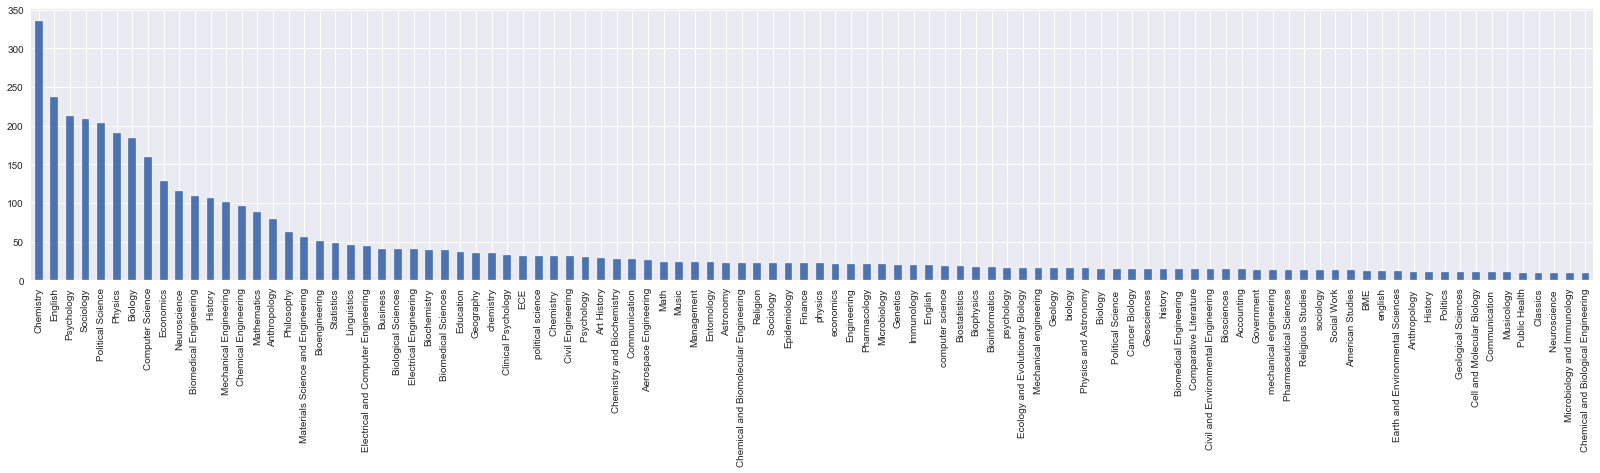

In [150]:
# ! Dataset is slightly "biased towards Chemistry Departments" -> keep this in mind when interpreting results !

stip.Department.value_counts()[0:100].plot(kind="bar", figsize=(28,5))

In [156]:
stip.Department.value_counts(dropna=False).sort_values(ascending=False)[0:50]   # , normalize=True

NaN                                      460
Chemistry                                335
English                                  237
Psychology                               212
Sociology                                209
Political Science                        203
Physics                                  191
Biology                                  184
Computer Science                         160
Economics                                129
Neuroscience                             115
Biomedical Engineering                   109
History                                  107
Mechanical Engineering                   101
Chemical Engineering                     96 
Mathematics                              89 
Anthropology                             79 
Philosophy                               63 
Materials Science and Engineering        56 
Bioengineering                           51 
Statistics                               48 
Linguistics                              46 
Electrical

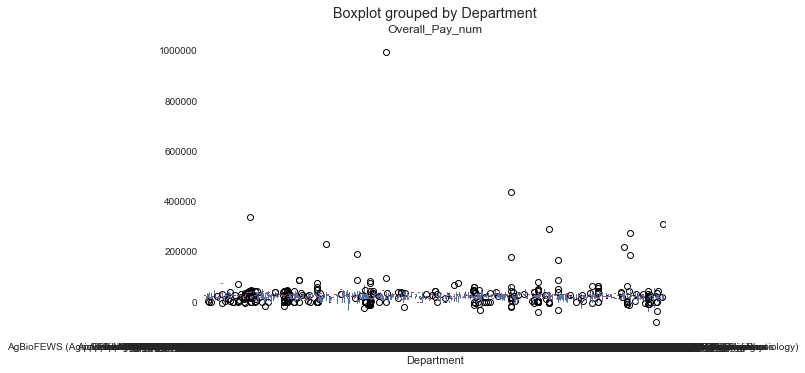

In [169]:
# Problem 1: at which threshold do I start cutting off outliers?
# -> go back to feature-engine techniques :)

stip.boxplot('Overall_Pay_num', by='Department') 

In [ ]:
''' The ANOVA test has important assumptions that must be satisfied in order for 
the associated p-value to be valid:

1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal. 
   This property is known as homoscedasticity. 
   
   from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html 
   '''

In [171]:
# One-Way-ANOVA using SciPy
# from https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

grps = pd.unique(stip.Department.values)
d_data = {grp:stip['Overall_Pay_num'][stip.Department == grp] for grp in grps}
k = len(pd.unique(stip.Department))
N = len(stip.values)
n = stip.groupby('Department').size()[0]

In [172]:
# One-Way-ANOVA using SciPy

from scipy import stats

f, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

KeyError: 'ctrl'

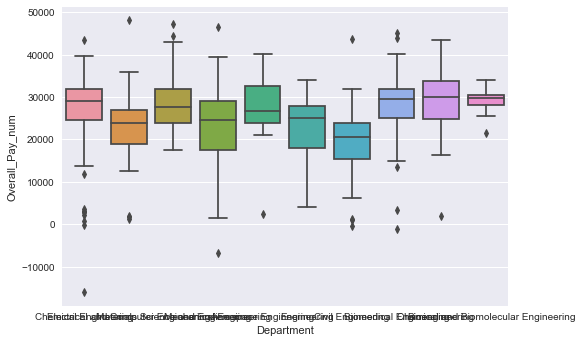

In [166]:
# check: does overall pay differ between e.g. 'Civil Engineering' and 'Electrical and Computer Engineering' ??
# -> barplot per category ... (after having removed the outliers !!!)

# eng_sub = stip[stip.Dep_DR == 'Engineering']
# len(eng_sub)                                 # 559 -> looks fine!

# plt.hist(eng_sub.Department, log=True) # -> not histogram!! boxplots would be nice!!
sns.boxplot( x=eng_sub["Department"], y=eng_sub["Overall_Pay_num"] )
# sns.plt.show()

In [157]:
# !!! I also have to check, whether there are significant differences between 
#     any of the subgroups I am smashing into the same category in these recoding steps... !!!!

# include Chem & Biochem into Chem and cleanup spelling issues ...

stip['Dep_DR'] = stip.Department.replace([('Chemistry', 'Chemistry ', ' Chemistry', 'chemistry', 'Chemistry and Biochemistry', 'Chemisty', 'chemisty')], 'Chemistry')
# stip['Dep_DR'] = stip.Dep_DR.replace([( )], )


In [159]:
# (Materials science included, since 56 unknown ...)

stip['Dep_DR'] = stip.Dep_DR.replace([('Biomedical Engineering', 'Mechanical Engineering', 'Chemical Engineering', 'Materials Science and Engineering', 'Bioengineering', 'Electrical and Computer Engineering', 'Civil Engineering', 'Aerospace Engineering', 'Chemical and Biomolecular Engineering', 'Engineering')], 'Engineering')

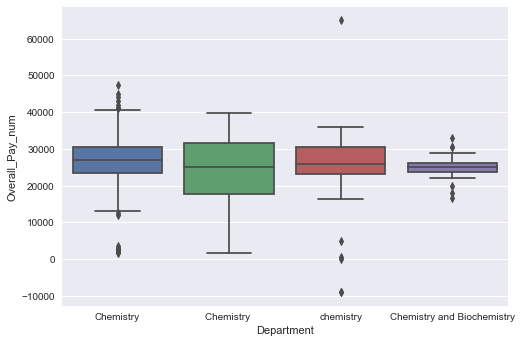

In [168]:
chem_sub = stip[stip.Dep_DR == 'Chemistry']
len(chem_sub)                                 # 428 -> looks fine!

# plt.hist(eng_sub.Department, log=True) # -> not histogram!! boxplots would be nice!!
sns.boxplot( x=chem_sub["Department"], y=chem_sub["Overall_Pay_num"] )
# sns.plt.show()

In [160]:
stip.Dep_DR.value_counts(dropna=False).sort_values(ascending=False)[0:50]   # , normalize=True

Engineering               559
NaN                       460
Chemistry                 428
English                   237
Psychology                212
Sociology                 209
Political Science         203
Physics                   191
Biology                   184
Computer Science          160
Economics                 129
Neuroscience              115
History                   107
Mathematics               89 
Anthropology              79 
Philosophy                63 
Statistics                48 
Linguistics               46 
Biological Sciences       41 
Business                  41 
Electrical Engineering    41 
Biomedical Sciences       39 
Biochemistry              39 
Education                 37 
Geography                 35 
Clinical Psychology       33 
ECE                       32 
political science         31 
Psychology                30 
Art History               29 
Communication             27 
Math                      24 
Music                     24 
Management

In [155]:
stip.Department.value_counts(dropna=False, normalize=True).sort_values(ascending=False)[35]

0.003560762692396049

In [121]:
stip.describe()

,LW_Ratio,Acad_Y,Overall_Pay_num,GrossPay_12M,GrossPay_9M,GrossPay_3M,Fees_num
count,7795.000000,8702.000000,8685.000000,6208.000000,2474.000000,798.000000,3351.000000
mean,1.080278,2017.053551,25230.707081,28228.496134,19596.169361,5043.095238,2572.105640
std,0.727431,2.056021,19235.105394,21324.900161,8944.673519,3743.738055,6663.333235
min,-3.780000,2002.000000,-80000.000000,1.000000,5.000000,3.000000,1.000000
25%,0.850000,2016.000000,19037.000000,23000.000000,15900.000000,3000.000000,500.000000
50%,1.100000,2017.000000,25000.000000,28000.000000,19000.000000,4500.000000,1000.000000
75%,1.300000,2018.000000,30400.000000,32000.000000,23000.000000,6000.000000,2000.000000
max,40.970000,2021.000000,994000.000000,1000000.000000,189600.000000,55816.000000,100000.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


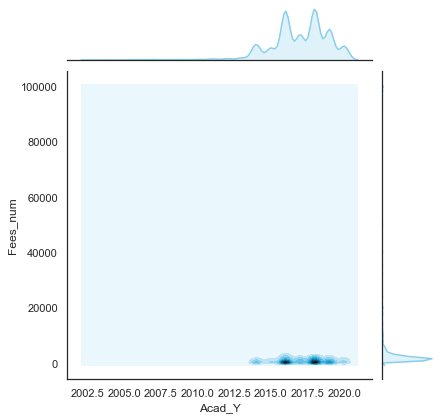

In [122]:
# -> there are not too many values for the academic years before around 2012 -> exclude early years from analysis!
# -> investigate the best year to start! :)

# https://python-graph-gallery.com/82-marginal-plot-with-seaborn/#prettyPhoto 
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html

# Custom the color
sns.set(style="white", color_codes=True)
sns.jointplot(x=stip["Acad_Y"], y=stip["Fees_num"], kind='kde', color="skyblue")

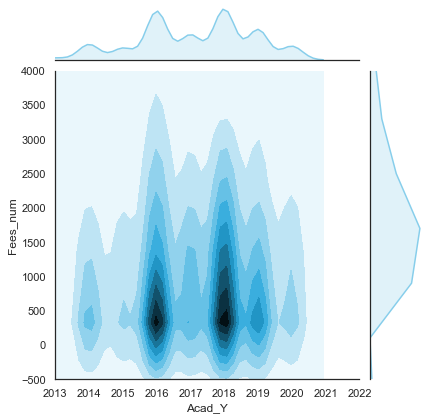

In [123]:
# -> 2016 & 2018: much more data available than for all other years?!!?!? -> restrict analysis to 2016-2019, e.g. !?!

sns.set(style="white", color_codes=True)
plot = sns.jointplot(x=stip["Acad_Y"], y=stip["Fees_num"], kind='kde', color="skyblue")

plot.ax_marg_x.set_xlim(2013, 2022)
plot.ax_marg_y.set_ylim(-500, 4000)

plt.show()

In [124]:
test_16to19 = stip.loc[2015<stip.Acad_Y<2020]
len(test_16to19)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [125]:
test_16to19 = stip.loc(stip[(stip['Acad_Y'] < 2020) & (stip['Acad_Y'] > 2015)].index)


TypeError: unhashable type: 'Int64Index'

In [126]:
# -> ca 1260 obs of academic years before 2016-2017

test_16to22 = stip.drop(stip[(stip.Acad_Y < 2016)].index)
test_16to22.shape

(7447, 17)

In [127]:
# -> ca 800 obs of academic years after 2019-2020

test_16to19 = test_16to22.drop(test_16to22[(test_16to22.Acad_Y > 2019)].index)
test_16to19.shape

(6678, 17)

In [128]:
plt.style.use('seaborn')
plt.figure(figsize = (25,12))

plt.scatter(PROVIDENCE.MM_Loc_Long, PROVIDENCE.MM_Loc_Lat, marker='v', color='red')
plt.scatter(KENT.MM_Loc_Long, KENT.MM_Loc_Lat, marker='v', color='magenta')
plt.scatter(WASHINGTON.MM_Loc_Long, WASHINGTON.MM_Loc_Lat, marker='v', color='cyan')

plt.scatter(NEWPORT.MM_Loc_Long, NEWPORT.MM_Loc_Lat, marker='v', color='green')
plt.scatter(BRISTOL.MM_Loc_Long, BRISTOL.MM_Loc_Lat, marker='v', color='brown')
plt.scatter(OTHER.MM_Loc_Long, OTHER.MM_Loc_Lat, alpha=0.5, marker='v', color='yellow')                # some of these distributed guys have cancelled due to moving,  

plt.scatter(moved_west.MM_Loc_Long, moved_west.MM_Loc_Lat, alpha=0.5, marker='v', color='blue')                  # guys having cancelled membership because they moved out of target area


# plt.xscale("log")                      # <- no. looks better with linear x-scale! :)
# plt.yscale("log")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.grid(True)
plt.show()

NameError: name 'PROVIDENCE' is not defined

<Figure size 1800x864 with 0 Axes>